### A check of how much the noise entropy is reduced by the repetition code of Smith-Smolin

In [4]:
import numpy as np
from scipy.special import binom
import matplotlib.pyplot as plt

In [5]:
def joint_prob(u,v,r,m, px,py,pz):
    #u: X error, v Zerror, r syndrome with weight r, m number of repetitions
    first_term = (px+py)**(u*(m-2*r)+r)*(1-px-py)**((1-u)*(m-2*r)+r)
    second_term = (px-py)**(u*(m-2*r)+r)*(1-px-py-2*pz)**((1-u)*(m-2*r)+r)
    return 0.5*(first_term+(-1)**v*second_term)

In [6]:
def probability_of_a_syndrome(r,m,px,py,pz):
    # r syndrome with weight r, m number of repetitions
    return joint_prob(0,0,r,m, px,py,pz)+joint_prob(0,1,r,m, px,py,pz)+joint_prob(1,0,r,m, px,py,pz)+joint_prob(1,1,r,m, px,py,pz)

In [7]:
def new_channel(r,m,px,py,pz):
    # r syndrome with weight r, m number of repetitions
    prob_syndrome = probability_of_a_syndrome(r,m,px,py,pz)
    pI = joint_prob(0,0,r,m, px,py,pz)/prob_syndrome
    pZ = joint_prob(0,1,r,m, px,py,pz)/prob_syndrome
    pX = joint_prob(1,0,r,m, px,py,pz)/prob_syndrome
    pY = joint_prob(1,1,r,m, px,py,pz)/prob_syndrome
    return pI,pX,pY,pZ

In [39]:
def entropy(p):
    pI = p[0]
    pX = p[1]
    pY = p[2]
    pZ = p[3]
    return -(pI*np.log2(pI)+pX*np.log2(pX)+pY*np.log2(pY)+pZ*np.log2(pZ))

In [8]:
def rate(p):
    pI = p[0]
    pX = p[1]
    pY = p[2]
    pZ = p[3]
    return 1+pI*np.log2(pI)+pX*np.log2(pX)+pY*np.log2(pY)+pZ*np.log2(pZ)

In [9]:
def concatenated_channel_rate(m,px,py,pz):
    # r syndrome with weight r, m number of repetitions
    concatenated_rate = 0
    for r in range(0,m):
        concatenated_rate += binom(m-1,r)*probability_of_a_syndrome(r,m,px,py,pz)*rate(new_channel(r,m,px,py,pz))
    return concatenated_rate/m

In [47]:


def get_best_rate(pX,pY,pZ):
    pvec = [1-pX-pY-pZ,pX,pY,pZ]
    best_rate = max(rate(pvec),0)
    best_number_of_repetitions = 1
    for repetitions in range(2,10):
        r = concatenated_channel_rate(repetitions,pX,pY,pZ)
        if r>=best_rate:
            best_rate = r
            best_number_of_repetitions = repetitions
    return best_rate


In [45]:
def distribution_gen(p_total):
    if (10-np.sqrt(100-36*p_total) >=0) and (10-np.sqrt(100-36*p_total)<=1):
        q = (10-np.sqrt(100-36*p_total))/18
    else:
        q = (10+np.sqrt(100-36*p_total))/18
    qx = 9*q
    qz = q
    pX = qx*(1-qz)
    pZ = qz*(1-qx)
    pY = qx*qz
    return pX,pY,pZ

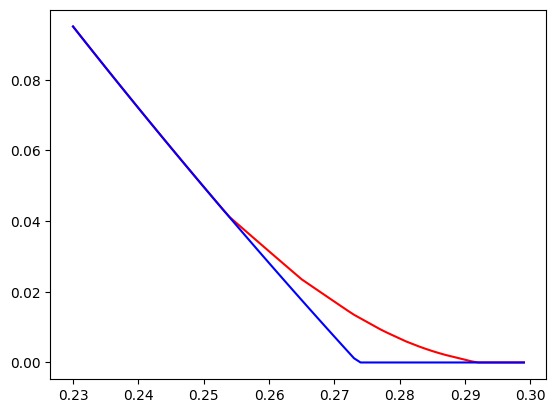

In [48]:
concatenated_best_rate = []
hashing_rate = []
prange =np.arange(0.23,0.3,0.001)
for p_total in prange:
    pX,pY,pZ = distribution_gen(p_total)
    pvec = [1-pX-pY-pZ,pX,pY,pZ]
    hashing_rate.append(max(rate(pvec),0))
    concatenated_best_rate.append(get_best_rate(pX,pY,pZ))
plt.plot(prange,concatenated_best_rate,'r')
plt.plot(prange,hashing_rate,'b')

In [49]:
def averaged_entropy(m,px,py,pz):
    avg_entropy = 0
    for r in range(0,m):
        avg_entropy += binom(m-1,r)*probability_of_a_syndrome(r,m,px,py,pz)*entropy(new_channel(r,m,px,py,pz))
    return avg_entropy/m

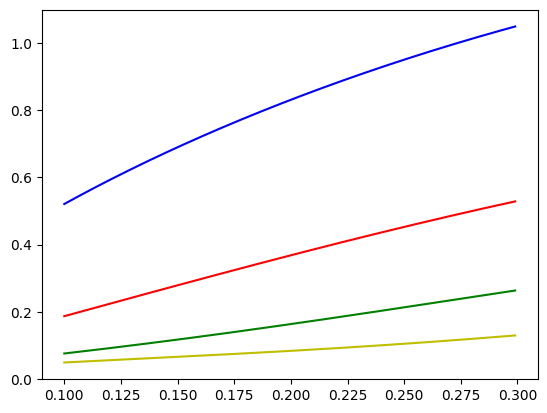

In [53]:
avg_entropy_2 = []
avg_entropy_4 = []
avg_entropy_8 = []
avg_entropy_9 = []


initial_entropy = []
prange =np.arange(0.1,0.3,0.001)
for p_total in prange:
    pX,pY,pZ = distribution_gen(p_total)
    pvec = [1-pX-pY-pZ,pX,pY,pZ]
    initial_entropy.append(entropy(pvec))
    avg_entropy_2.append(averaged_entropy(2,pX,pY,pZ))
    avg_entropy_4.append(averaged_entropy(4,pX,pY,pZ))
    avg_entropy_8.append(averaged_entropy(8,pX,pY,pZ))
    avg_entropy_9.append(averaged_entropy(9,pX,pY,pZ))
plt.plot(prange,avg_entropy_2,'r')
plt.plot(prange,avg_entropy_4,'g')
plt.plot(prange,avg_entropy_8,'y')
plt.plot(prange,initial_entropy,'b')